##### Import & Seed:

In [1]:
# Libraries:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
import dill

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
#from sklearn.linear_model import Lasso

from Data import SINDy_data
from Data import data
from Data import equations

from Data.auxiliar_functions import SRT_simulation, D_CODE_simulation, set_param_freq, intercept_library_fun, bb_combinations

np.random.seed(999)

### STD

In [2]:
# Select ODE & settings:
ode_name = 'SelkovODE'
ode_param = '0.8,0.1'
freq = 10
dt = 1 / freq
n_sample = 50 
noise_ratio = 0.01
dim_x = 2
dim_k = 0
ode_param, freq = set_param_freq(ode_param, freq)
ode = equations.get_ode(ode_name, ode_param)

In [3]:
T0s = [5, 10, 15, 20]
Ts = [20, 25, 30, 35]

for T0, T in zip(T0s, Ts):
    print(f'T0: {T0}, T: {T}')

    X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k, T0, T)
    print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
    print(feature_names)

    print('SINDy model:')
    polynomial_library = ps.PolynomialLibrary(degree = 3, include_bias=True)
    model_sigma_1 = ps.SINDy(feature_names  = feature_names, feature_library= polynomial_library, optimizer=ps.STLSQ(threshold=0.09))
    model_sigma_1.fit(X_list, t=dt, multiple_trajectories=True, x_dot = dX_list)
    model_sigma_1.print()
    print('')

T0: 5, T: 20
(50, 150, 2) (50, 150, 2) (0,)
['X0', 'X1']

SINDy model:
(X0)' = 0.799 1 + -0.102 X0 + -0.996 X0 X1^2
(X1)' = -0.989 X1 + 0.225 X0 X1 + 0.884 X0 X1^2
T0: 10, T: 25
(50, 150, 2) (50, 150, 2) (0,)
['X0', 'X1']

SINDy model:
(X0)' = 0.711 1 + 0.252 X1 + -0.289 X0 X1 + -0.168 X1^2 + -0.802 X0 X1^2
(X1)' = -0.115 1 + 0.116 X0 + -0.655 X1 + -0.358 X1^2 + 0.973 X0 X1^2 + 0.135 X1^3
T0: 15, T: 30
(50, 150, 2) (50, 150, 2) (0,)
['X0', 'X1']

SINDy model:
(X0)' = 0.704 1 + 0.246 X1 + -0.265 X0 X1 + -0.156 X1^2 + -0.828 X0 X1^2
(X1)' = 0.255 1 + -1.349 X1 + 0.065 X1^2 + 1.131 X0 X1^2 + 0.002 X1^3
T0: 20, T: 35
(50, 150, 2) (50, 150, 2) (0,)
['X0', 'X1']

SINDy model:
(X0)' = 0.590 1 + 0.235 X1 + -1.129 X0 X1^2
(X1)' = -0.063 1 + 0.112 X0 + -0.839 X1 + -0.146 X1^2 + 0.981 X0 X1^2 + 0.054 X1^3


In [4]:
T0s = [5, 10, 15, 20]
Ts = [15, 20, 25, 30]

for T0, T in zip(T0s, Ts):
    print(f'T0: {T0}, T: {T}')

    X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k, T0, T)
    print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
    print(feature_names)

    print('SINDy model:')
    polynomial_library = ps.PolynomialLibrary(degree = 3, include_bias=True)
    model_sigma_1 = ps.SINDy(feature_names  = feature_names, feature_library= polynomial_library, optimizer=ps.STLSQ(threshold=0.09))
    model_sigma_1.fit(X_list, t=dt, multiple_trajectories=True, x_dot = dX_list)
    model_sigma_1.print()
    print('')

T0: 5, T: 15
(50, 100, 2) (50, 100, 2) (0,)
['X0', 'X1']
SINDy model:
(X0)' = 0.785 1 + -0.211 X0 X1 + -0.895 X0 X1^2
(X1)' = -0.493 X1 + -0.637 X1^2 + 1.055 X0 X1^2 + 0.186 X1^3

T0: 10, T: 20
(50, 100, 2) (50, 100, 2) (0,)
['X0', 'X1']
SINDy model:
(X0)' = 0.583 1 + 0.221 X1 + -1.110 X0 X1^2
(X1)' = -0.879 X1 + 0.283 X0 X1 + -0.304 X1^2 + 0.807 X0 X1^2 + 0.185 X1^3

T0: 15, T: 25
(50, 100, 2) (50, 100, 2) (0,)
['X0', 'X1']
SINDy model:
(X0)' = 0.797 1 + -0.256 X0 X1 + -0.843 X0 X1^2
(X1)' = -0.402 X1 + -1.081 X1^2 + 1.131 X0 X1^2 + 0.451 X1^3

T0: 20, T: 30
(50, 100, 2) (50, 100, 2) (0,)
['X0', 'X1']
SINDy model:
(X0)' = 0.772 1 + 0.127 X1 + -0.309 X0 X1 + -0.108 X1^2 + -0.783 X0 X1^2
(X1)' = -0.952 X1 + 0.289 X0 X1 + -0.162 X1^2 + 0.804 X0 X1^2 + 0.120 X1^3



In [5]:
T0s = [5, 10, 15]
Ts = [35, 40, 45]

for T0, T in zip(T0s, Ts):
    print(f'T0: {T0}, T: {T}')

    X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k, T0, T)
    print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
    print(feature_names)

    print('SINDy model:')
    polynomial_library = ps.PolynomialLibrary(degree = 3, include_bias=True)
    model_sigma_1 = ps.SINDy(feature_names  = feature_names, feature_library= polynomial_library, optimizer=ps.STLSQ(threshold=0.09))
    model_sigma_1.fit(X_list, t=dt, multiple_trajectories=True, x_dot = dX_list)
    model_sigma_1.print()
    print('')

T0: 5, T: 35
(50, 300, 2) (50, 300, 2) (0,)
['X0', 'X1']
SINDy model:
(X0)' = 0.790 1 + -0.212 X0 X1 + -0.892 X0 X1^2
(X1)' = 0.102 X0 + -0.995 X1 + 0.993 X0 X1^2

T0: 10, T: 40
(50, 300, 2) (50, 300, 2) (0,)
['X0', 'X1']
SINDy model:
(X0)' = 0.711 1 + 0.247 X1 + -0.284 X0 X1 + -0.165 X1^2 + -0.807 X0 X1^2
(X1)' = 0.100 X0 + -0.995 X1 + 0.994 X0 X1^2

T0: 15, T: 45
(50, 300, 2) (50, 300, 2) (0,)
['X0', 'X1']
SINDy model:
(X0)' = 0.702 1 + 0.250 X1 + -0.265 X0 X1 + -0.159 X1^2 + -0.827 X0 X1^2
(X1)' = -0.037 1 + 0.111 X0 + -0.918 X1 + -0.062 X1^2 + 0.980 X0 X1^2 + 0.024 X1^3



-> take-home: SINDy non è perfetta, non si tratta di trovare il modello esatto al 100%, ma di migliorarne (magari sensibilmente) la performance  
-> non giudicare il risultato esclusivamente come esatto o meno, ma farlo in termini di errore e robustezza su future time-instants

In [6]:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k, T0=20, T=50)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

print('SINDy model:')
polynomial_library = ps.PolynomialLibrary(degree = 3, include_bias=True)
model_sigma_1 = ps.SINDy(feature_names  = feature_names, feature_library= polynomial_library, optimizer=ps.STLSQ(threshold=0.09))
model_sigma_1.fit(X_list, t=dt, multiple_trajectories=True, x_dot = dX_list)
model_sigma_1.print()

(50, 300, 2) (50, 300, 2) (0,)
['X0', 'X1']
SINDy model:
(X0)' = 0.589 1 + 0.240 X1 + -1.131 X0 X1^2
(X1)' = -0.031 1 + 0.110 X0 + -0.940 X1 + -0.036 X1^2 + 0.984 X0 X1^2 + 0.012 X1^3


In [3]:
# generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k, T0=0, T=10)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

# save data:
with open('selkov_data.pkl', 'wb') as f:
    dill.dump((X_list, dX_list, param_list, feature_names), f)

(50, 100, 2) (50, 100, 2) (0,)
['X0', 'X1']


In [3]:
# uploda data:
with open('selkov_data.pkl', 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

In [ ]:
# model selection:
#RMK. in questo caso settiamo include_bias=True perche' nel modello è presente un termine costante rispetto alle variabili e il parametro forniti
thresholds = np.array([0.005, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.2])
rmse_values = np.zeros(len(thresholds))
for i in range(len(thresholds)):
    model = ps.SINDy(feature_names=feature_names, feature_library=ps.PolynomialLibrary(degree=3, include_bias=True), optimizer=ps.STLSQ(threshold=thresholds[i]))
    model.fit(X_list, t=dt, multiple_trajectories=True, x_dot=dX_list)
    rmse, _ = SINDy_data.evaluate_RMSE(model, ode, freq, 10, [0.1, 0.1], [0, 0], dim_k)
    rmse_values[i] = rmse
    print('Threshold: ', thresholds[i], ', RMSE: ', rmse)

plt.figure(figsize=(5, 3))
plt.plot(thresholds, rmse_values, marker='o')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.xscale('log')
plt.grid(True)
plt.show()

In [4]:
# best models:
model_sigma = ps.SINDy(feature_names  = feature_names, feature_library= ps.PolynomialLibrary(degree = 3, include_bias=True), optimizer=ps.STLSQ(threshold=0.05))
model_sigma.fit(X_list, t=dt, multiple_trajectories=True, x_dot = dX_list)
model_sigma.print()

# comparison with smart_SINDy model:
# final model:
print('')
print('SINDy model:')
polynomial_library = ps.PolynomialLibrary(degree = 3, include_bias=True)
model_sigma_1 = ps.SINDy(feature_names  = feature_names, feature_library= polynomial_library, optimizer=ps.STLSQ(threshold=0.09))
model_sigma_1.fit(X_list, t=dt, multiple_trajectories=True, x_dot = dX_list)
model_sigma_1.print()


# library:
print('')
length = 0
#print('library:')
library_terms = polynomial_library.get_feature_names(input_features=feature_names)
for term in library_terms:
    print(term)
    length += 1
print('length:', length)

(X0)' = 0.693 1 + 0.264 X1 + -0.296 X0 X1 + -0.129 X1^2 + -0.832 X0 X1^2
(X1)' = -0.727 X1 + 0.276 X0 X1 + -0.467 X1^2 + 0.844 X0 X1^2 + 0.178 X1^3

SINDy model:
(X0)' = 0.735 1 + -0.215 X0 X1 + -0.871 X0 X1^2
(X1)' = -0.727 X1 + 0.276 X0 X1 + -0.467 X1^2 + 0.844 X0 X1^2 + 0.178 X1^3

1
X0
X1
X0^2
X0 X1
X1^2
X0^3
X0^2 X1
X0 X1^2
X1^3
length: 10


Best Model RMSE:  0.008602774342929326
Best Model 1 RMSE:  0.008602774342929326


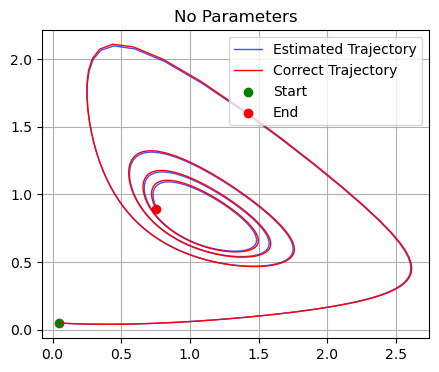

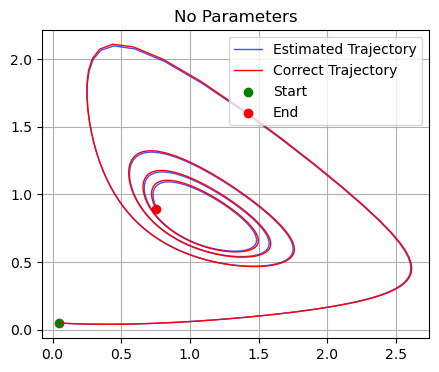

In [7]:
# evaluation
n_sample = 25
rmse_sigma, _ = SINDy_data.evaluate_RMSE(model_sigma, ode, freq, n_sample, [0.1, 0.1], [0, 0], dim_k)
print('Best Model RMSE: ', rmse_sigma)
rmse_sigma_1, _ = SINDy_data.evaluate_RMSE(model_sigma_1, ode, freq, n_sample, [0.1, 0.1], [0, 0], dim_k)
print('Best Model 1 RMSE: ', rmse_sigma_1)

n_sample = 1
title = r'No Parameters'
SINDy_data.evaluate_traj(model_sigma, ode, freq, n_sample, [0.05, 0.05], [0.05, 0.05], dim_x, dim_k, title=title)
SINDy_data.evaluate_traj(model_sigma_1, ode, freq, n_sample, [0.05, 0.05], [0.05, 0.05], dim_x, dim_k, title=title)

### Dev

In [2]:
# Select ODE & settings:
ode_name = 'SelkovODE'
ode_param = '0.8,0.1'
freq = 10
dt = 1 / freq
n_sample = 50 
noise_ratio = 0.01
dim_x = 2
dim_k = 0
ode_param, freq = set_param_freq(ode_param, freq)
ode = equations.get_ode(ode_name, ode_param)

T0 = 0
T = 15

In [3]:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k, T0, T)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

print('SINDy model:')
polynomial_library = ps.PolynomialLibrary(degree = 3, include_bias=True)
model = ps.SINDy(feature_names  = feature_names, feature_library= polynomial_library, optimizer=ps.STLSQ(threshold=0.09))
model.fit(X_list, t=dt, multiple_trajectories=True, x_dot = dX_list)
model.print()

(50, 150, 2) (50, 150, 2) (0,)
['X0', 'X1']
SINDy model:
(X0)' = 0.797 1 + -0.099 X0 + -0.997 X0 X1^2
(X1)' = 0.101 X0 + -0.993 X1 + 0.992 X0 X1^2


Best Model RMSE:  0.006581085479823553


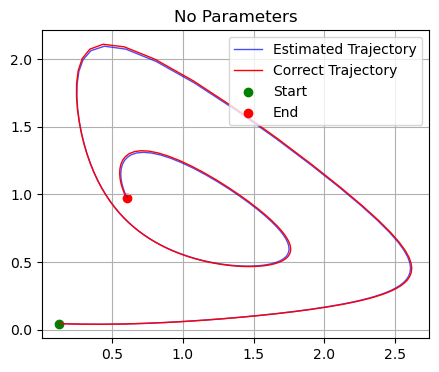

In [5]:
# evaluation
n_sample = 25
rmse, _ = SINDy_data.evaluate_RMSE(model, ode, freq, n_sample, [0.1, 0.1], [0, 0], dim_k)
print('Best Model RMSE: ', rmse)

n_sample = 1
title = r'No Parameters'
SINDy_data.evaluate_traj(model, ode, freq, n_sample, [0.05, 0.05], [0.05, 0.05], dim_x, dim_k, title=title)

In [15]:
T0 = 10
T = 30
x_id = 0

n_sample = 25
rmse, _ = SINDy_data.evaluate_RMSE_d(model, ode, freq, n_sample, [0.1, 0.1], [0, 0], T0, T, dim_k)
print('RMSE: ', rmse)
rmse1D, _ = SINDy_data.evaluate_RMSE_d_1D(model, ode, freq, n_sample, [0.1, 0.1], [0, 0], T0, T, x_id=0, dim_k=dim_k)
print('1D RMSE: ', rmse1D)
rmse1D, _ = SINDy_data.evaluate_RMSE_d_1D(model, ode, freq, n_sample, [0.1, 0.1], [0, 0], T0, T, x_id=1, dim_k=dim_k)
print('1D RMSE: ', rmse1D)

RMSE:  0.0074727412762772396
(200, 25, 2)
(200, 25, 2)
(200, 25)
(200, 25)
1D RMSE:  0.009004682857067368
(200, 25, 2)
(200, 25, 2)
(200, 25)
(200, 25)
1D RMSE:  0.005940799695487112


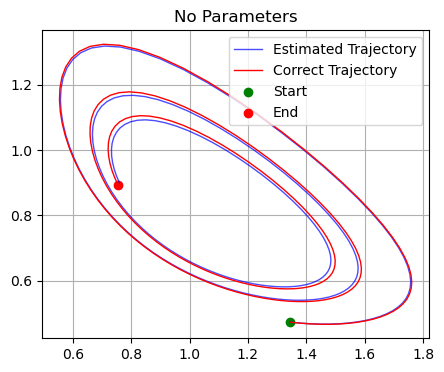

In [16]:
n_sample = 1
title = r'No Parameters'
SINDy_data.evaluate_traj_d(model, ode, freq, n_sample, [0.05, 0.05], [0.05, 0.05], T0, T, dim_x, dim_k, title=title)

(200,)
(200,)


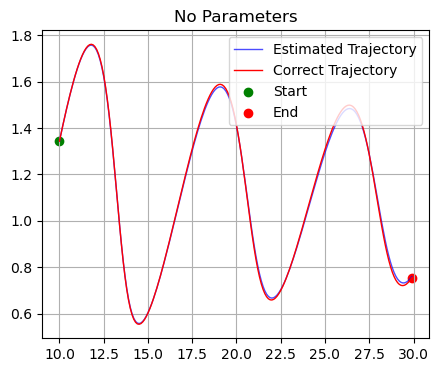

In [17]:
n_sample = 1
title = r'No Parameters'
SINDy_data.evaluate_traj_d_1D(model, ode, freq, n_sample, [0.05, 0.05], [0.05, 0.05], T0, T, x_id, dim_x, dim_k, title=title)

### SINDy dynamic

##### Static Sel'kov

In [2]:
# Select ODE & settings:
ode_name = 'SelkovODE'
ode_param = '0.8,0.1'
freq = 10
dt = 1 / freq
n_sample = 50 
noise_ratio = 0.01
dim_x = 2
dim_k = 0
ode_param, freq = set_param_freq(ode_param, freq)
ode = equations.get_ode(ode_name, ode_param)

In [4]:
# generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k, 0, 50)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

# save data:
with open('selkov_data.pkl', 'wb') as f:
    dill.dump((X_list, dX_list, param_list, feature_names), f)

(50, 500, 2) (50, 500, 2) (0,)
['X0', 'X1']


In [26]:
# uploda data:
with open('selkov_data.pkl', 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

In [31]:
# SINDy - dynamic application:

T0 = 0
T = 15
H = 50

rmses = []
while T < H:

    print(f'T0: {T0}, T: {T}')

    X_list_t = [x[(T0*freq):(T*freq)] for x in X_list]
    dX_list_t = [dx[(T0*freq):(T*freq)] for dx in dX_list]  
    # TODO: generalizzare al caso param_list != 0
    #print(np.shape(X_list_t), np.shape(dX_list_t))

    print('SINDy model:')
    polynomial_library = ps.PolynomialLibrary(degree = 3, include_bias=True)
    model = ps.SINDy(feature_names  = feature_names, feature_library= polynomial_library, optimizer=ps.STLSQ(threshold=0.09))
    model.fit(X_list_t, t=dt, multiple_trajectories=True, x_dot = dX_list_t)
    model.print()

    #if T % 5 == 0: # ogni 5 iterazioni, valiutiamo il modello
    n_sample = 10
    rmse, _ = SINDy_data.evaluate_RMSE_d(model, ode, freq, n_sample, [0.1, 0.1], [0, 0], T, T+5, dim_k)
    print('RMSE: ', rmse) # RMSE on time window [T, T+5]
    rmses.append(rmse)
    print('')

    T0 += 1
    T += 1

T0: 0, T: 15
SINDy model:
(X0)' = 0.797 1 + -0.099 X0 + -0.997 X0 X1^2
(X1)' = 0.100 X0 + -0.993 X1 + 0.992 X0 X1^2
RMSE:  0.003894819766806367

T0: 1, T: 16
SINDy model:
(X0)' = 0.663 1 + -0.988 X0 X1^2
(X1)' = 0.100 X0 + -0.994 X1 + 0.993 X0 X1^2
RMSE:  0.030936513927142518

T0: 2, T: 17
SINDy model:
(X0)' = 0.663 1 + -0.987 X0 X1^2
(X1)' = 0.100 X0 + -0.994 X1 + 0.993 X0 X1^2
RMSE:  0.033167622731859484

T0: 3, T: 18
SINDy model:
(X0)' = 0.669 1 + -0.991 X0 X1^2
(X1)' = 0.101 X0 + -0.994 X1 + 0.993 X0 X1^2
RMSE:  0.04411637950973066

T0: 4, T: 19
SINDy model:
(X0)' = 0.790 1 + -0.230 X0 X1 + -0.883 X0 X1^2
(X1)' = 0.101 X0 + -0.994 X1 + 0.993 X0 X1^2
RMSE:  0.018096369868216965

T0: 5, T: 20
SINDy model:
(X0)' = 0.798 1 + -0.101 X0 + -0.996 X0 X1^2
(X1)' = -0.989 X1 + 0.223 X0 X1 + 0.885 X0 X1^2
RMSE:  0.02212146758254186

T0: 6, T: 21
SINDy model:
(X0)' = 0.803 1 + -0.098 X0 + -1.009 X0 X1^2
(X1)' = -0.141 1 + 0.170 X0 + -0.584 X1 + -0.171 X0 X1 + -0.364 X1^2 + 1.097 X0 X1^2 + 0.09

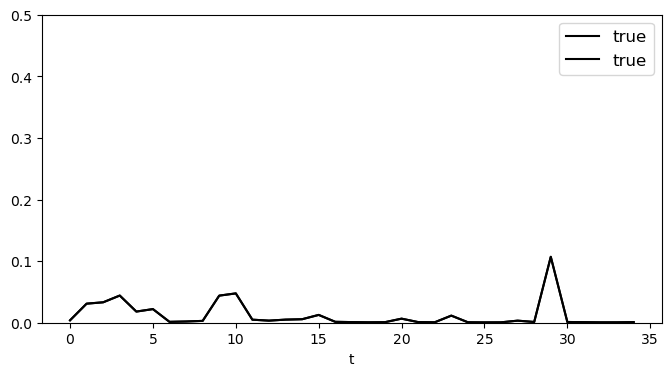

In [35]:
plt.figure(figsize = [8,4])
for i in range(2):
    #plt.subplot(211 +i)
    plt.plot(rmses, 'k', label = 'true')
    plt.xlabel('t')
    plt.ylim(0., 0.5)
    plt.legend(fontsize = 12)

##### Dynamic Sel'kov with SINDy

In [2]:
# Select ODE & settings:
ode_name = 'OscillatingSelkovODE_d'
ode_param = '0.8,0.1'
freq = 10
dt = 1 / freq
n_sample = 50 
noise_ratio = 0.01
dim_x = 3
dim_k = 0
ode_param, freq = set_param_freq(ode_param, freq)
ode = equations.get_ode(ode_name, ode_param)

In [3]:
# generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k, 0, 50)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

# save data:
with open('dynamic_selkov_data.pkl', 'wb') as f:
    dill.dump((X_list, dX_list, param_list, feature_names), f)

(50, 500, 3) (50, 500, 3) (0,)
['X0', 'X1', 'X2']


In [3]:
# uploda data:
with open('dynamic_selkov_data.pkl', 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

In [16]:
# SINDy - dynamic application:

T0 = 0
T = 15
H = 50

rmses = []
complexities = []
lasso_penalties = []
while T < H:

    print(f'T0: {T0}, T: {T}')

    X_list_t = [x[(T0*freq):(T*freq)] for x in X_list]
    dX_list_t = [dx[(T0*freq):(T*freq)] for dx in dX_list]  
    # TODO: generalizzare al caso param_list != 0
    #print(np.shape(X_list_t), np.shape(dX_list_t))

    print('SINDy model:')
    polynomial_library = ps.PolynomialLibrary(degree = 3, include_bias=True)
    model = ps.SINDy(feature_names  = feature_names, feature_library= polynomial_library, optimizer=ps.STLSQ(threshold=0.09))
    model.fit(X_list_t, t=dt, multiple_trajectories=True, x_dot = dX_list_t)
    model.print()

    coefficients = model.coefficients()
    complexities.append(np.count_nonzero(np.array(model.coefficients())))
    print('Model complexity: ', np.count_nonzero(np.array(model.coefficients())))
    lasso_penalty = np.sum(np.abs(coefficients))
    lasso_penalties.append(lasso_penalty)
    print('Lasso penalty: ', lasso_penalty)
    if np.count_nonzero(np.array(model.coefficients())) < 15 and lasso_penalty < 15:
        n_sample = 10
        rmse, _ = SINDy_data.evaluate_RMSE_d(model, ode, freq, n_sample, [0.1, 0.1, 0], [0, 0, 0], T, T+10, dim_k)
        print('RMSE: ', rmse) # RMSE on time window [T, T+5]
        print('')
        rmses.append(rmse)
    else:
        print('Too complex')
        print('')
        rmses.append(5)

    T0 += 1
    T += 1

T0: 0, T: 15
SINDy model:
(X0)' = 0.697 1 + 0.247 X1 + -0.279 X0 X1 + -0.122 X1^2 + -0.843 X0 X1^2
(X1)' = -0.791 X1 + 0.261 X0 X1 + -0.352 X1^2 + 0.853 X0 X1^2 + 0.137 X1^3
(X2)' = 1.000 1
Model complexity:  11
Lasso penalty:  5.582959280002431
RMSE:  0.07007113633717701

T0: 1, T: 16
SINDy model:
(X0)' = 0.798 1 + -0.100 X0 + -0.998 X0 X1^2
(X1)' = 0.100 X0 + -0.995 X1 + 0.994 X0 X1^2
(X2)' = 1.000 1
Model complexity:  7
Lasso penalty:  4.983930295609188
RMSE:  0.0028060961903782254

T0: 2, T: 17
SINDy model:
(X0)' = 0.753 1 + -0.211 X0 X1 + -0.873 X0 X1^2
(X1)' = 0.100 X0 + -0.995 X1 + 0.994 X0 X1^2
(X2)' = 1.000 1
Model complexity:  7
Lasso penalty:  4.9268662045278315
RMSE:  0.022292191326792103

T0: 3, T: 18
SINDy model:
(X0)' = 0.669 1 + -0.991 X0 X1^2
(X1)' = -0.369 1 + 0.220 X0 + -0.230 X0 X1 + -0.807 X1^2 + 1.091 X0 X1^2 + 0.200 X1^3
(X2)' = 1.000 1
Model complexity:  9
Lasso penalty:  5.577319059904362
RMSE:  0.06406026559131131

T0: 4, T: 19
SINDy model:
(X0)' = 0.790 1 + -

/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(


RMSE:  4.538721003343932

T0: 14, T: 29
SINDy model:
(X0)' = -0.956 1 + 3.509 X0 + -2.729 X0^2 + 1.233 X1^2 + 0.727 X0^3 + -0.032 X0^2 X1 + -1.461 X0 X1^2 + -0.542 X1^3
(X1)' = -0.992 X1 + 0.254 X0 X1 + 0.841 X0 X1^2
(X2)' = 0.000
Model complexity:  11
Lasso penalty:  13.274805948686007


/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(


RMSE:  2.0268532478964687

T0: 15, T: 30
SINDy model:
(X0)' = 8.738 1 + -11.455 X0 + -23.069 X1 + 0.287 X2 + 3.822 X0^2 + 22.086 X0 X1 + -0.115 X0 X2 + 21.926 X1^2 + -0.567 X1 X2 + -5.290 X0^2 X1 + -9.783 X0 X1^2 + 0.156 X0 X1 X2 + -7.052 X1^3 + 0.232 X1^2 X2
(X1)' = -0.878 X1 + 0.258 X0 X1 + -0.293 X1^2 + 0.838 X0 X1^2 + 0.173 X1^3
(X2)' = 0.000
Model complexity:  19
Lasso penalty:  117.01838839658151
Too complex

T0: 16, T: 31
SINDy model:
(X0)' = -6.736 1 + 13.259 X0 + -2.288 X1 + 0.331 X2 + -8.924 X0^2 + -0.248 X0 X2 + 9.131 X1^2 + -0.363 X1 X2 + 2.648 X0^3 + -0.722 X0^2 X1 + -4.133 X0 X1^2 + 0.283 X0 X1 X2 + -2.497 X1^3
(X1)' = 0.100 X0 + -1.000 X1 + 0.999 X0 X1^2
(X2)' = 1.000 1
Model complexity:  17
Lasso penalty:  54.659936634541516
Too complex

T0: 17, T: 32
SINDy model:
(X0)' = 1.719 1 + -2.306 X0 + -1.750 X1 + 0.404 X0^2 + 5.310 X0 X1 + -0.548 X1^2 + 0.479 X0^3 + -2.804 X0^2 X1 + -0.754 X0 X1^2
(X1)' = -1.181 1 + 2.556 X0 X1 + -0.420 X0^2 X1 + -0.835 X0 X1^2
(X2)' = 1.000 1


/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all 

(X0)' = 38.244 1 + -54.930 X0 + 24.755 X1 + -1.638 X2 + 23.060 X0^2 + -27.240 X0 X1 + 2.190 X0 X2 + -52.882 X1^2 + 0.898 X1 X2 + -1.911 X0^3 + 7.219 X0^2 X1 + -0.671 X0^2 X2 + 24.333 X0 X1^2 + -0.702 X0 X1 X2 + 16.675 X1^3
(X1)' = 0.900 X0 + -3.892 X0 X1 + 0.475 X0^2 X1 + 3.217 X0 X1^2 + -0.611 X1^3
(X2)' = 0.000
Model complexity:  20
Lasso penalty:  286.4418495561747
Too complex

T0: 21, T: 36
SINDy model:
(X0)' = 23.431 1 + -13.298 X0 + -62.957 X1 + -0.107 X2 + 2.728 X0^2 + 15.398 X0 X1 + 0.222 X0 X2 + 64.928 X1^2 + 0.079 X1 X2 + -0.699 X0^3 + -0.445 X0^2 X1 + -4.656 X0 X1^2 + -0.239 X0 X1 X2 + -23.399 X1^3
(X1)' = 0.100 X0 + -0.995 X1 + 0.994 X0 X1^2
(X2)' = 0.000
Model complexity:  17
Lasso penalty:  214.67480375850062
Too complex

T0: 22, T: 37
SINDy model:
(X0)' = 50.130 1 + -7.461 X0 + -163.209 X1 + -0.501 X2 + -5.070 X0^2 + 30.537 X0 X1 + 0.146 X0 X2 + 165.807 X1^2 + 1.062 X1 X2 + 2.383 X0^3 + -4.984 X0^2 X1 + -11.313 X0 X1^2 + -0.166 X0 X1 X2 + -57.445 X1^3 + -0.518 X1^2 X2
(X

/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(


(X0)' = 57.606 1 + -36.369 X0 + -190.694 X1 + 0.460 X2 + 15.179 X0^2 + 50.083 X0 X1 + 220.872 X1^2 + -0.914 X1 X2 + -2.338 X0^3 + -9.421 X0^2 X1 + -18.871 X0 X1^2 + -85.367 X1^3 + 0.433 X1^2 X2
(X1)' = -0.731 X1 + -0.288 X1^2 + 1.124 X0 X1^2
(X2)' = 1.000 1
Model complexity:  17
Lasso penalty:  691.7471967904464
Too complex

T0: 32, T: 47
SINDy model:
(X0)' = 45.273 1 + -21.066 X0 + -156.627 X1 + 0.372 X2 + 7.677 X0^2 + 31.667 X0 X1 + 187.046 X1^2 + -0.784 X1 X2 + -1.128 X0^3 + -5.141 X0^2 X1 + -13.111 X0 X1^2 + -74.046 X1^3 + 0.393 X1^2 X2
(X1)' = 0.101 X0 + -0.996 X1 + 0.994 X0 X1^2
(X2)' = 0.000
Model complexity:  16
Lasso penalty:  546.4218656097477
Too complex

T0: 33, T: 48
SINDy model:
(X0)' = 71.939 1 + -33.863 X0 + -228.962 X1 + 0.347 X2 + 9.213 X0^2 + 56.838 X0 X1 + 255.009 X1^2 + -0.837 X1 X2 + -0.742 X0^3 + -8.405 X0^2 X1 + -23.299 X0 X1^2 + -96.950 X1^3 + 0.469 X1^2 X2
(X1)' = 0.000
(X2)' = 0.000
Model complexity:  13
Lasso penalty:  786.8738162351451
Too complex

T0: 34, 

/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all 

Text(0.5, 1.0, 'Lasso penalty')

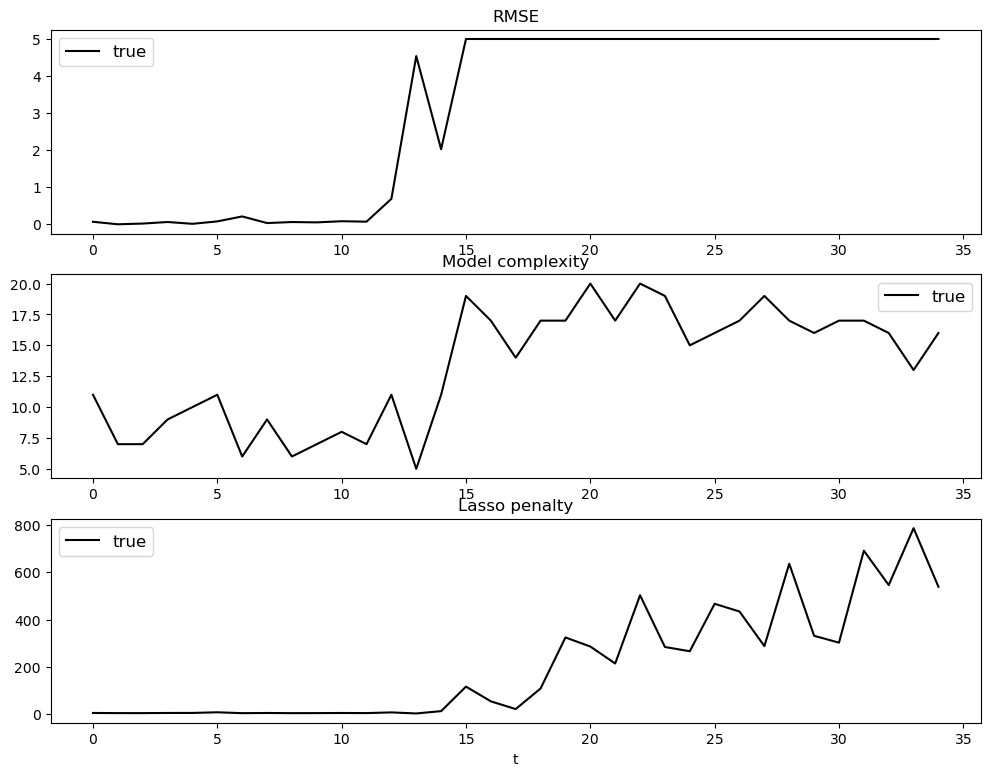

In [17]:
plt.figure(figsize = [12,9])
plt.subplot(311)
plt.plot(rmses, 'k', label = 'true')
#plt.xlabel('t')
#plt.ylim(0., 0.5)
plt.legend(fontsize = 12)
plt.title('RMSE')

plt.subplot(312)
plt.plot(complexities, 'k', label = 'true')
#plt.xlabel('t')
#plt.ylim(0., 15)
plt.legend(fontsize = 12)
plt.title('Model complexity')

plt.subplot(313)
plt.plot(lasso_penalties, 'k', label = 'true')
plt.xlabel('t')
#plt.ylim(0., 15)
plt.legend(fontsize = 12)
plt.title('Lasso penalty')


I modelli ottengono buoni risultati in temrini di RMSE, fino a che testati su privi del termine sinusoidale. Il valore di RMSE, una volta comparso il termine sinusoidale, cresce rapidamente.

Non appena nel training set compaiono dati associati al termine alieno la complessità del modello si alza di colpo, non permettendoci di calcolare l'errore a causa di problemi computazionali.

L'aumento di complessità si nota specialmente osservando la time-series della model complexity, che impenna vertiginosmanete non appena il termine sinusoidale comincia a comparire nel dataset di training.
La libreria a disposizione di SINDy, infatti, non è adeguata a modellare il termine alieno, per cui SINDy ritorna una complessa approssimazione polinomiale. Tale approssimazione, tuttavia, non generalizza bene ai dati test, come si può notare dall'impennata dell'RMSE associato a dati con termine sinusoidale.

RMK. Dato il problema a ricavare l'RMSE di modelli troppo complessi, possiamo usare la lasso penalty come termine rappresentativo della bontà del modello identificato. Quando il modello diventa troopo complesso, evidentemente ciò che sto ottenenendo non è una buona approssimazione, ma solo una complessa interpolazione e vale la pena ricalibrare la candidate function library...
cazzata 

In [11]:
# SINDy - dynamic application:

T0 = 0
T = 15
H = 50

rmse = 100
rmses = []
complexities = []
lasso_penalties = []
while T < H:

    print(f't: {T0}')

    if rmse > 0.1: 
        X_list_t = [x[(T0*freq):(T*freq)] for x in X_list]
        dX_list_t = [dx[(T0*freq):(T*freq)] for dx in dX_list]  
        # TODO: generalizzare al caso param_list != 0
        #print(np.shape(X_list_t), np.shape(dX_list_t))

        print('SINDy model:')
        polynomial_library = ps.PolynomialLibrary(degree = 3, include_bias=True)
        model = ps.SINDy(feature_names  = feature_names, feature_library= polynomial_library, optimizer=ps.STLSQ(threshold=0.08))
        model.fit(X_list_t, t=dt, multiple_trajectories=True, x_dot = dX_list_t)
        model.print()

        coefficients = model.coefficients()
        model_complexity = np.count_nonzero(np.array(model.coefficients()))
        print('Model complexity: ', model_complexity)
        lasso_penalty = np.sum(np.abs(coefficients))
        print('Lasso penalty: ', lasso_penalty)

    complexities.append(model_complexity)
    lasso_penalties.append(lasso_penalty)

    if model_complexity < 20 and lasso_penalty < 20:
        rmse, _ = SINDy_data.evaluate_RMSE_d(model, ode, freq, 10, [0.1, 0.1, 0], [0, 0, 0], T, T+10, dim_k)
        print('RMSE: ', rmse) # RMSE on time window [T, T+5]
        print('')
        rmses.append(rmse)
    else:
        print('Too complex')
        print('')
        rmses.append(0.5)

    T0 += 1
    T += 1

t: 0
SINDy model:
(X0)' = 0.697 1 + 0.247 X1 + -0.279 X0 X1 + -0.122 X1^2 + -0.843 X0 X1^2
(X1)' = 0.100 X0 + -0.994 X1 + 0.994 X0 X1^2
(X2)' = 1.000 1
Model complexity:  9
Lasso penalty:  5.276726801055558
RMSE:  0.02241027422617134

t: 1
RMSE:  0.022781007737175837

t: 2
RMSE:  0.020898447742606536

t: 3
RMSE:  0.022668063248026605

t: 4
RMSE:  0.02254471844553562

t: 5
RMSE:  0.02464228611302079

t: 6
RMSE:  0.03670991117608356

t: 7
RMSE:  0.04226852517342287

t: 8
RMSE:  0.05064971905200286

t: 9
RMSE:  0.05983531150577438

t: 10
RMSE:  0.06353972552090702

t: 11
RMSE:  0.08023521481758569

t: 12
RMSE:  0.08613706563459698

t: 13
RMSE:  0.09089840585223101

t: 14
RMSE:  0.11151900217477947

t: 15
SINDy model:
(X0)' = 8.738 1 + -11.455 X0 + -23.069 X1 + 0.287 X2 + 3.822 X0^2 + 22.086 X0 X1 + -0.115 X0 X2 + 21.926 X1^2 + -0.567 X1 X2 + -5.290 X0^2 X1 + -9.783 X0 X1^2 + 0.156 X0 X1 X2 + -7.052 X1^3 + 0.232 X1^2 X2
(X1)' = -0.878 X1 + 0.258 X0 X1 + -0.293 X1^2 + 0.838 X0 X1^2 + 0.173 

/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all 

(X0)' = 38.244 1 + -54.930 X0 + 24.755 X1 + -1.638 X2 + 23.060 X0^2 + -27.240 X0 X1 + 2.190 X0 X2 + -52.882 X1^2 + 0.898 X1 X2 + -1.911 X0^3 + 7.219 X0^2 X1 + -0.671 X0^2 X2 + 24.333 X0 X1^2 + -0.702 X0 X1 X2 + 16.675 X1^3
(X1)' = -0.097 X0 + -0.097 X0 X1 + -1.649 X1^2 + 0.140 X0^2 X1 + 1.039 X0 X1^2 + 0.749 X1^3
(X2)' = 0.000
Model complexity:  21
Lasso penalty:  281.1182194272776
Too complex

t: 21
SINDy model:
(X0)' = 23.431 1 + -13.298 X0 + -62.957 X1 + -0.107 X2 + 2.728 X0^2 + 15.398 X0 X1 + 0.222 X0 X2 + 64.928 X1^2 + 0.079 X1 X2 + -0.699 X0^3 + -0.445 X0^2 X1 + -4.656 X0 X1^2 + -0.239 X0 X1 X2 + -23.399 X1^3
(X1)' = 0.100 X0 + -0.995 X1 + 0.994 X0 X1^2
(X2)' = 0.000
Model complexity:  17
Lasso penalty:  214.67480375850062
Too complex

t: 22
SINDy model:
(X0)' = 50.130 1 + -7.461 X0 + -163.209 X1 + -0.501 X2 + -5.070 X0^2 + 30.537 X0 X1 + 0.146 X0 X2 + 165.807 X1^2 + 1.062 X1 X2 + 2.383 X0^3 + -4.984 X0^2 X1 + -11.313 X0 X1^2 + -0.166 X0 X1 X2 + -57.445 X1^3 + -0.518 X1^2 X2
(X1)

/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(


(X0)' = 38.534 1 + -17.639 X0 + -128.744 X1 + 0.233 X2 + 4.423 X0^2 + 31.177 X0 X1 + 145.882 X1^2 + -0.441 X1 X2 + -0.184 X0^3 + -4.610 X0^2 X1 + -13.673 X0 X1^2 + -54.343 X1^3 + 0.177 X1^2 X2
(X1)' = 0.328 X0^2 + -2.090 X0 X1 + 2.556 X0 X1^2 + -0.703 X1^3
(X2)' = 0.832 X0
Model complexity:  18
Lasso penalty:  446.5693698451547
Too complex

t: 27
SINDy model:
(X0)' = 20.736 1 + -5.138 X0 + -80.364 X1 + 0.293 X2 + -3.372 X0^2 + 12.501 X0 X1 + 0.198 X0 X2 + 106.612 X1^2 + -0.822 X1 X2 + 1.160 X0^3 + -0.429 X0^2 X1 + -2.305 X0 X1^2 + -0.264 X0 X1 X2 + -47.877 X1^3 + 0.541 X1^2 X2
(X1)' = 0.319 X0^2 + -2.071 X0 X1 + 2.550 X0 X1^2 + -0.706 X1^3
(X2)' = 0.000
Model complexity:  19
Lasso penalty:  288.25875103850484
Too complex

t: 28
SINDy model:
(X0)' = 52.433 1 + -38.297 X0 + -166.799 X1 + 0.514 X2 + 13.867 X0^2 + 58.294 X0 X1 + 190.171 X1^2 + -1.147 X1 X2 + -1.703 X0^3 + -10.692 X0^2 X1 + -21.887 X0 X1^2 + -74.461 X1^3 + 0.607 X1^2 X2
(X1)' = 0.319 X0^2 + -2.064 X0 X1 + 2.542 X0 X1^2 + -0

/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(


(X0)' = 45.273 1 + -21.066 X0 + -156.627 X1 + 0.372 X2 + 7.677 X0^2 + 31.667 X0 X1 + 187.046 X1^2 + -0.784 X1 X2 + -1.128 X0^3 + -5.141 X0^2 X1 + -13.111 X0 X1^2 + -74.046 X1^3 + 0.393 X1^2 X2
(X1)' = 0.101 X0 + -0.996 X1 + 0.994 X0 X1^2
(X2)' = 0.000
Model complexity:  16
Lasso penalty:  546.4218656097477
Too complex

t: 33
SINDy model:
(X0)' = 71.939 1 + -33.863 X0 + -228.962 X1 + 0.347 X2 + 9.213 X0^2 + 56.838 X0 X1 + 255.009 X1^2 + -0.837 X1 X2 + -0.742 X0^3 + -8.405 X0^2 X1 + -23.299 X0 X1^2 + -96.950 X1^3 + 0.469 X1^2 X2
(X1)' = 0.101 X0 + -0.995 X1 + 0.994 X0 X1^2
(X2)' = 0.000
Model complexity:  16
Lasso penalty:  788.9635290081198
Too complex

t: 34
SINDy model:
(X0)' = 45.465 1 + -28.527 X0 + -144.415 X1 + 0.427 X2 + 9.556 X0^2 + 44.369 X0 X1 + 168.817 X1^2 + -1.047 X1 X2 + -1.233 X0^3 + -6.693 X0^2 X1 + -18.665 X0 X1^2 + -67.910 X1^3 + 0.595 X1^2 X2
(X1)' = 0.101 X0 + -0.996 X1 + 0.994 X0 X1^2
(X2)' = 0.000
Model complexity:  16
Lasso penalty:  539.809192725433
Too complex



/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all 

Text(0.5, 1.0, 'RMSE, static SINDy')

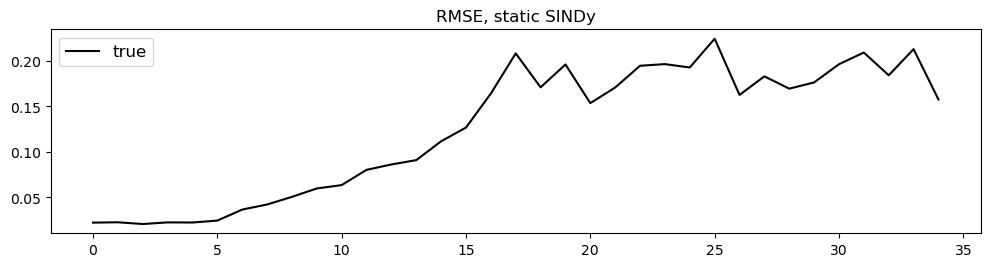

In [5]:
# static SINDy - il modello viene trainato sulla time-window [0,15] e mai più aggiornato
plt.figure(figsize = [12,9])
plt.subplot(311)
plt.plot(rmses, 'k', label = 'true')
#plt.xlabel('t')
#plt.ylim(0., 0.5)
plt.legend(fontsize = 12)
plt.title('RMSE, static SINDy')


Text(0.5, 1.0, 'Lasso penalty')

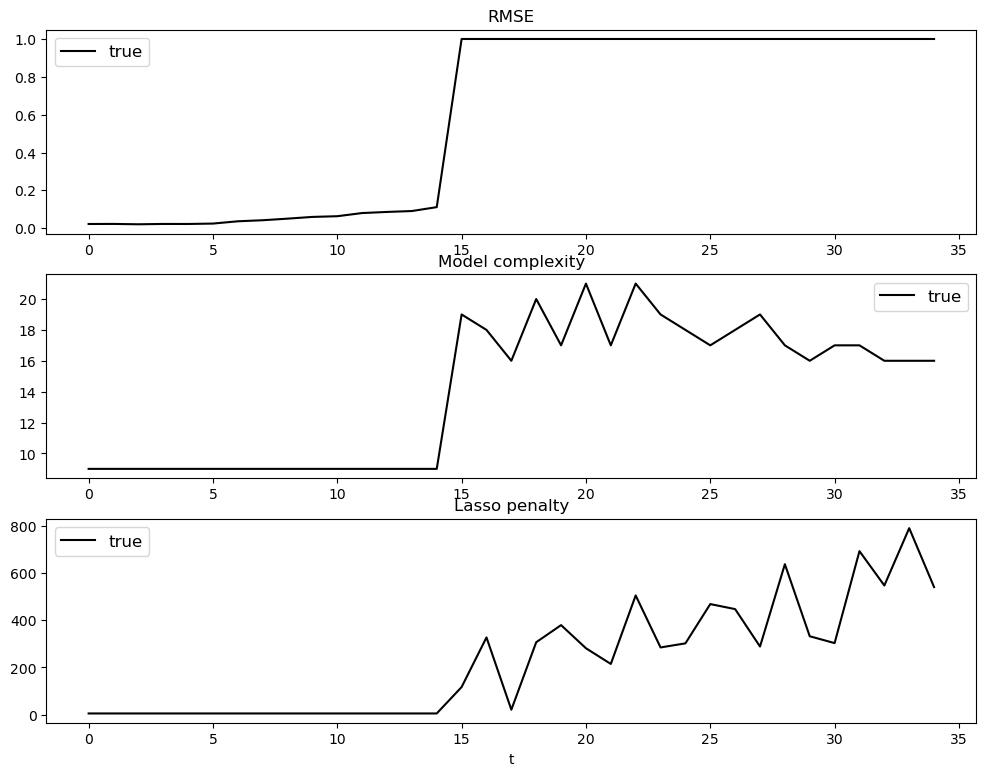

In [10]:
# dynamic SINDy - oltre una certa soglia, richiamo SINDy

plt.figure(figsize = [12,9])
plt.subplot(311)
plt.plot(rmses, 'k', label = 'true')
#plt.xlabel('t')
#plt.ylim(0., 0.5)
plt.legend(fontsize = 12)
plt.title('RMSE')

plt.subplot(312)
plt.plot(complexities, 'k', label = 'true')
#plt.xlabel('t')
#plt.ylim(0., 15)
plt.legend(fontsize = 12)
plt.title('Model complexity')

plt.subplot(313)
plt.plot(lasso_penalties, 'k', label = 'true')
plt.xlabel('t')
#plt.ylim(0., 15)
plt.legend(fontsize = 12)
plt.title('Lasso penalty')

Il tentativo di aggiornare il modello trainandolo sui dati in cui è presente il termine alieno fallisce in quanto, non avendo a disposizione nella libreria il termine adatto a modellare il fenomeno, il nuovo modello risulta esageratemente complesso ed inadatto alla rappresentazione del fenomeno.

##### Dynamic Sel'kov with smart-SINDy

In [2]:
# Select ODE & settings:
ode_name = 'OscillatingSelkovODE_d'
ode_param = '0.8,0.1'
x_id = 0
freq = 10
freq_SR = 20
n_sample = 50 
noise_ratio = 0.01
alg = 'tv'
seed = 100 
n_seed = 1 


ode_param, freq = set_param_freq(ode_param, freq)
ode = equations.get_ode(ode_name, ode_param)
dt = 1 / freq
dim_x = 3
dim_k = 0
time_vector = np.arange(0, ode.T + dt, dt)

In [ ]:
# generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k, 0, 50)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

# save data:
with open('dynamic_selkov_data.pkl', 'wb') as f:
    dill.dump((X_list, dX_list, param_list, feature_names), f)

In [3]:
# uploda data:
with open('dynamic_selkov_data.pkl', 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

sin(3.1394689809108645*X2)


/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


In [5]:
# SINDy - dynamic application:

T0 = 0
T = 15
H = 100

rmse = 100
rmses = []
complexities = []
lasso_penalties = []
while T < H:

    print(f't: {T0}')

    # update time-window:
    X_list_t = [x[(T0*freq):(T*freq)] for x in X_list]
    dX_list_t = [dx[(T0*freq):(T*freq)] for dx in dX_list]  
    #print(np.shape(X_list_t), np.shape(dX_list_t))

    # t = 0 -> call SINDy
    if T0 == 0:
        print('SINDy model:')
        polynomial_library = ps.PolynomialLibrary(degree = 3, include_bias=True)
        model = ps.SINDy(feature_names  = feature_names, feature_library= polynomial_library, optimizer=ps.STLSQ(threshold=0.08))
        model.fit(X_list_t, t=dt, multiple_trajectories=True, x_dot = dX_list_t)
        model.print()

        coefficients = model.coefficients()
        model_complexity = np.count_nonzero(np.array(model.coefficients()))
        print('Model complexity: ', model_complexity)
        lasso_penalty = np.sum(np.abs(coefficients))
        print('Lasso penalty: ', lasso_penalty)
        model_star = model

    # model fault detected -> call smart-SINDy
    if rmse > 0.1 and T0 > 0:  

        # upload building blocks:

        ##### insert SR call #####

        with open('oscillating_selkov_bb_0.pkl', 'rb') as f:
            building_blocks_lambda, function_names = dill.load(f)

        # building the library:
        intercept_library = intercept_library_fun(dim_x+dim_k) # intercept library
        polynomial_library = ps.PolynomialLibrary(degree=3, include_bias=False) # polynomial library
        custom_library = ps.CustomLibrary(library_functions=building_blocks_lambda, function_names=function_names) # custom library with building block
        generalized_library = ps.ConcatLibrary([polynomial_library, custom_library]) # enlarged library, adding the building block to polynomial library
        final_library = ps.ConcatLibrary([intercept_library, generalized_library]) # add the intercept

        # fitting the model:
        model = ps.SINDy(feature_names=feature_names, feature_library=final_library, optimizer=ps.STLSQ(threshold=0.09))
        model.fit(X_list_t, t=dt, multiple_trajectories=True, x_dot=dX_list_t)
        print('smart-SINDy model:')
        model.print()   

        # print('')
        # print('library:')
        # library_terms = final_library.get_feature_names(input_features=feature_names)
        # for term in library_terms:
        #     print(term)    

        # evalutating the model, part 1:
        coefficients = model.coefficients()
        model_complexity = np.count_nonzero(np.array(model.coefficients()))
        print('Model complexity: ', model_complexity)
        lasso_penalty = np.sum(np.abs(coefficients))
        print('Lasso penalty: ', lasso_penalty)


    # evaluating the model, part 2:

    complexities.append(model_complexity)
    lasso_penalties.append(lasso_penalty)

    if model_complexity < 20 and lasso_penalty < 20: # if the model is not too complex, we update model_star, used to compute the RMSE
        model_star = model
    else:
        print('Too complex')
    
    rmse, _ = SINDy_data.evaluate_RMSE_d(model_star, ode, freq, 10, [0.1, 0.1, 0], [0, 0, 0], T, T+10, dim_k)
    print('RMSE: ', rmse) # RMSE on time window [T, T+10]
    print('')
    rmses.append(rmse)

    T0 += 1
    T += 1

t: 0
SINDy model:
(X0)' = 0.697 1 + 0.247 X1 + -0.279 X0 X1 + -0.122 X1^2 + -0.843 X0 X1^2
(X1)' = 0.100 X0 + -0.994 X1 + 0.994 X0 X1^2
(X2)' = 1.000 1
Model complexity:  9
Lasso penalty:  5.276726801055558
RMSE:  0.02241027422617134

t: 1
RMSE:  0.022781007737175837

t: 2
RMSE:  0.020898447742606536

t: 3
RMSE:  0.022668063248026605

t: 4
RMSE:  0.02254471844553562

t: 5
RMSE:  0.02464228611302079

t: 6
RMSE:  0.03670991117608356

t: 7
RMSE:  0.04226852517342287

t: 8
RMSE:  0.05064971905200286

t: 9
RMSE:  0.05983531150577438

t: 10
RMSE:  0.06353972552090702

t: 11
RMSE:  0.08023521481758569

t: 12
RMSE:  0.08613706563459698

t: 13
RMSE:  0.09089840585223101

t: 14
RMSE:  0.11151900217477947

t: 15
smart-SINDy model:
(X0)' = 8.738 1 + -11.455 X0 + -23.069 X1 + 0.287 X2 + 3.822 X0^2 + 22.086 X0 X1 + -0.115 X0 X2 + 21.926 X1^2 + -0.567 X1 X2 + -5.290 X0^2 X1 + -9.783 X0 X1^2 + 0.156 X0 X1 X2 + -7.052 X1^3 + 0.232 X1^2 X2
(X1)' = -0.878 X1 + 0.258 X0 X1 + -0.293 X1^2 + 0.838 X0 X1^2 + 

/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(


RMSE:  0.1265980666323911

t: 16
smart-SINDy model:
(X0)' = -6.736 1 + 13.259 X0 + -2.288 X1 + 0.331 X2 + -8.924 X0^2 + -0.248 X0 X2 + 9.131 X1^2 + -0.363 X1 X2 + 2.648 X0^3 + -0.722 X0^2 X1 + -4.133 X0 X1^2 + 0.283 X0 X1 X2 + -2.497 X1^3
(X1)' = 0.100 X0 + -1.000 X1 + 0.999 X0 X1^2
(X2)' = 1.000 1
Model complexity:  17
Lasso penalty:  54.659936634541516
Too complex
RMSE:  0.1638146801218002

t: 17
smart-SINDy model:
(X0)' = -8.654 1 + 6.480 X0 + 30.115 X1 + -0.117 X2 + -2.169 X0^2 + -8.646 X0 X1 + -33.443 X1^2 + 0.199 X1 X2 + 2.158 X0^2 X1 + 1.111 X0 X1^2 + 12.609 X1^3 + -0.079 X1^2 X2 + 0.154 sin(3.1394689809108645*X2)
(X1)' = -1.181 1 + 2.556 X0 X1 + -0.420 X0^2 X1 + -0.835 X0 X1^2
(X2)' = 1.000 1
Model complexity:  18
Lasso penalty:  111.92859416205897
Too complex
RMSE:  0.20784296481591397

t: 18
smart-SINDy model:
(X0)' = 12.190 1 + -6.766 X0 + -29.798 X1 + -0.299 X0^2 + 14.903 X0 X1 + 23.737 X1^2 + 0.534 X0^3 + -1.150 X0^2 X1 + -7.989 X0 X1^2 + -5.714 X1^3 + 0.204 sin(3.13946898

/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(


RMSE:  0.17063116095315584

t: 19
smart-SINDy model:
(X0)' = 62.548 1 + -76.441 X0 + -82.536 X1 + -0.968 X2 + 28.993 X0^2 + 59.108 X0 X1 + 1.286 X0 X2 + 41.521 X1^2 + 0.643 X1 X2 + -2.947 X0^3 + -9.839 X0^2 X1 + -0.357 X0^2 X2 + -12.386 X0 X1^2 + -0.591 X0 X1 X2 + -8.823 X1^3 + 0.233 sin(3.1394689809108645*X2)
(X1)' = -0.459 X0 X1 + -1.510 X1^2 + 0.170 X0^2 X1 + 1.256 X0 X1^2 + 0.629 X1^3
(X2)' = 0.000
Model complexity:  21
Lasso penalty:  393.2429780820278
Too complex


/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(


RMSE:  0.19569036631677306

t: 20
smart-SINDy model:
(X0)' = 10.806 1 + -6.310 X0 + -24.616 X1 + 1.696 X0^2 + 8.268 X0 X1 + 20.851 X1^2 + -0.481 X0^3 + 0.700 X0^2 X1 + -6.337 X0 X1^2 + -4.983 X1^3 + 0.339 sin(3.1394689809108645*X2)
(X1)' = -0.097 X0 + -0.097 X0 X1 + -1.649 X1^2 + 0.140 X0^2 X1 + 1.039 X0 X1^2 + 0.749 X1^3
(X2)' = 0.000
Model complexity:  17
Lasso penalty:  89.15779177561978
Too complex


/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(


RMSE:  0.15331795458042619

t: 21
smart-SINDy model:
(X0)' = 12.804 1 + -9.452 X0 + -32.525 X1 + 3.413 X0^2 + 7.627 X0 X1 + 0.119 X0 X2 + 33.527 X1^2 + -1.120 X0^3 + 0.900 X0^2 X1 + -2.837 X0 X1^2 + -0.159 X0 X1 X2 + -11.533 X1^3 + 0.362 sin(3.1394689809108645*X2)
(X1)' = 0.100 X0 + -0.995 X1 + 0.994 X0 X1^2
(X2)' = 0.000
Model complexity:  16
Lasso penalty:  118.46670092652315
Too complex


/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(


RMSE:  0.170454534174368

t: 22
smart-SINDy model:
(X0)' = 49.411 1 + -22.584 X0 + -133.812 X1 + -0.555 X2 + 3.994 X0^2 + 36.665 X0 X1 + 0.268 X0 X2 + 123.684 X1^2 + 1.000 X1 X2 + -5.770 X0^2 X1 + -10.025 X0 X1^2 + -0.324 X0 X1 X2 + -42.164 X1^3 + -0.370 X1^2 X2 + 0.412 sin(3.1394689809108645*X2)
(X1)' = -0.902 X1 + 0.283 X0 X1 + -0.276 X1^2 + 0.807 X0 X1^2 + 0.184 X1^3
(X2)' = 0.000
Model complexity:  20
Lasso penalty:  433.4900141293042
Too complex


/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(


RMSE:  0.19426787997718464

t: 23
smart-SINDy model:
(X0)' = 20.312 1 + -14.737 X0 + -54.382 X1 + 5.914 X0^2 + 12.605 X0 X1 + 0.198 X0 X2 + 68.704 X1^2 + -0.359 X1 X2 + -1.460 X0^3 + -1.806 X0^2 X1 + -3.817 X0 X1^2 + -0.164 X0 X1 X2 + -30.954 X1^3 + 0.308 X1^2 X2 + 0.517 sin(3.1394689809108645*X2)
(X1)' = 0.100 X0 + -0.996 X1 + 0.994 X0 X1^2
(X2)' = 1.000 1
Model complexity:  19
Lasso penalty:  219.32898190400556
Too complex
RMSE:  0.19607808446713684

t: 24
smart-SINDy model:
(X0)' = 16.384 1 + -2.872 X0 + -56.075 X1 + 1.121 X0^2 + 4.210 X0 X1 + 67.249 X1^2 + -0.349 X0^3 + -3.637 X0 X1^2 + -26.256 X1^3 + 0.587 sin(3.1394689809108645*X2)
(X1)' = -0.824 1 + 1.196 X0 X1 + -0.279 X0 X1^2
(X2)' = 1.000 1
Model complexity:  14
Lasso penalty:  182.04089035635837
Too complex
RMSE:  0.1923904784466555

t: 25
smart-SINDy model:
(X0)' = 26.995 1 + -12.362 X0 + -86.742 X1 + 0.152 X2 + 5.475 X0^2 + 15.572 X0 X1 + 102.144 X1^2 + -0.366 X1 X2 + -1.335 X0^3 + -1.359 X0^2 X1 + -8.405 X0 X1^2 + -39.806

/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(


RMSE:  0.16232815012355237

t: 27
smart-SINDy model:
(X0)' = 30.622 1 + -19.571 X0 + -85.163 X1 + 8.200 X0^2 + 25.807 X0 X1 + 86.867 X1^2 + -1.712 X0^3 + -2.864 X0^2 X1 + -12.729 X0 X1^2 + -29.704 X1^3 + 0.783 sin(3.1394689809108645*X2)
(X1)' = 0.319 X0^2 + -2.071 X0 X1 + 2.550 X0 X1^2 + -0.706 X1^3
(X2)' = 0.000
Model complexity:  15
Lasso penalty:  309.66643095347365
Too complex


/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(


RMSE:  0.18266641472370002

t: 28
smart-SINDy model:
(X0)' = -17.980 1 + 8.281 X0 + 21.172 X1 + 0.874 X2 + -7.165 X0 X1 + -0.331 X0 X2 + 16.813 X1^2 + -1.750 X1 X2 + -0.006 X0^3 + 0.129 X0^2 X1 + -6.527 X0 X1^2 + 0.437 X0 X1 X2 + -15.543 X1^3 + 0.785 X1^2 X2 + 0.863 sin(3.1394689809108645*X2)
(X1)' = 0.578 X0^2 + -2.281 X0 X1 + 1.742 X0 X1^2
(X2)' = 0.000
Model complexity:  18
Lasso penalty:  103.25706653424565
Too complex


/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(


RMSE:  0.16917074642113591

t: 29
smart-SINDy model:
(X0)' = 3.078 1 + 1.739 X0 + -19.683 X1 + 0.162 X2 + 0.374 X0 X1 + -0.113 X0 X2 + 29.166 X1^2 + -0.202 X1 X2 + -4.643 X0 X1^2 + 0.145 X0 X1 X2 + -9.993 X1^3 + 0.911 sin(3.1394689809108645*X2)
(X1)' = -0.730 X1 + -0.285 X1^2 + 1.121 X0 X1^2
(X2)' = 1.093 X0 X1
Model complexity:  16
Lasso penalty:  73.43954608986908
Too complex
RMSE:  0.17602297394647146

t: 30
smart-SINDy model:
(X0)' = 0.545 1 + 0.703 X0 + 0.473 X1 + -0.452 X0^2 + -1.113 X0 X1 + 0.602 X0^2 X1 + -1.102 X0 X1^2 + 0.948 sin(3.1394689809108645*X2)
(X1)' = -0.995 X1 + 0.250 X0 X1 + 0.844 X0 X1^2
(X2)' = 1.000 1
Model complexity:  12
Lasso penalty:  9.026817598182948
RMSE:  0.02799395481021849

t: 31
RMSE:  0.01711013586771557

t: 32
RMSE:  0.029160903472036908

t: 33
RMSE:  0.028674613777949155

t: 34
RMSE:  0.024194311766678866

t: 35
RMSE:  0.028358598177149787

t: 36
RMSE:  0.021645249997584735

t: 37
RMSE:  0.01958561330959265

t: 38
RMSE:  0.02849640826948676

t: 39


Text(0.5, 1.0, 'Lasso penalty')

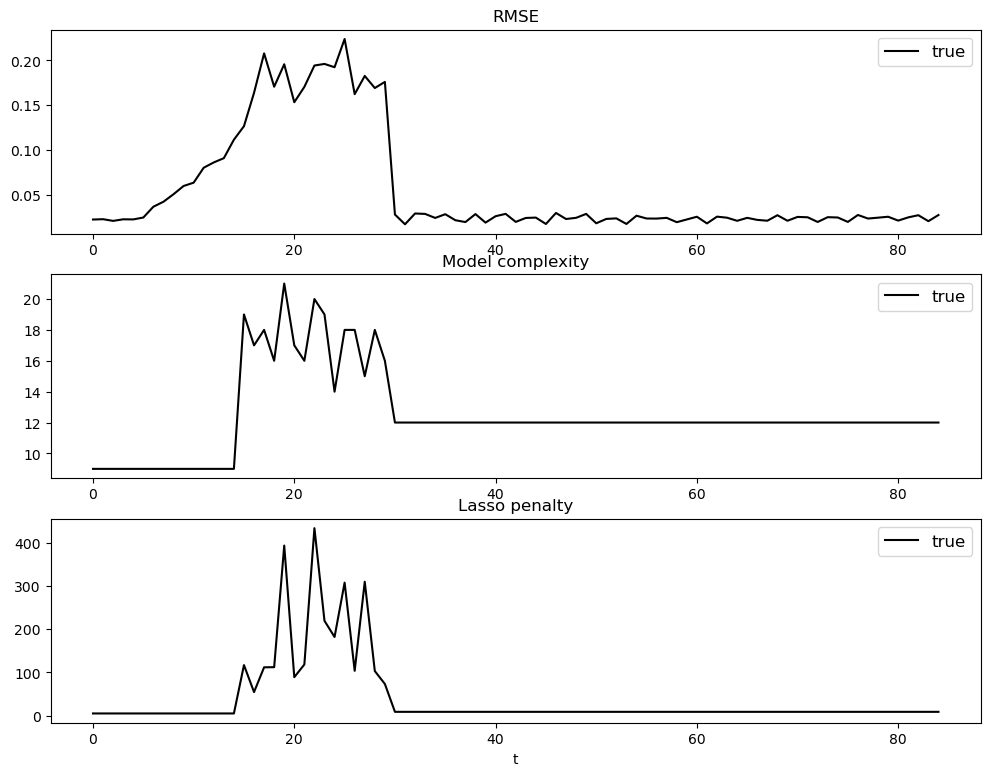

In [6]:
# dynamic SINDy - oltre una certa soglia, richiamo SINDy

plt.figure(figsize = [12,9])
plt.subplot(311)
plt.plot(rmses, 'k', label = 'true')
#plt.xlabel('t')
#plt.ylim(0., 0.5)
plt.legend(fontsize = 12)
plt.title('RMSE')

plt.subplot(312)
plt.plot(complexities, 'k', label = 'true')
#plt.xlabel('t')
#plt.ylim(0., 15)
plt.legend(fontsize = 12)
plt.title('Model complexity')

plt.subplot(313)
plt.plot(lasso_penalties, 'k', label = 'true')
plt.xlabel('t')
#plt.ylim(0., 15)
plt.legend(fontsize = 12)
plt.title('Lasso penalty')

In [ ]:
# SINDy - dynamic application:

T0 = 0
T = 15
H = 50

rmse = 100
rmses = []
complexities = []
lasso_penalties = []
while T < H:

    print(f't: {T0}')


    if T0 == 0:
        X_list_t = [x[(T0*freq):(T*freq)] for x in X_list]
        dX_list_t = [dx[(T0*freq):(T*freq)] for dx in dX_list]  
        # TODO: generalizzare al caso param_list != 0
        #print(np.shape(X_list_t), np.shape(dX_list_t))

        print('SINDy model:')
        polynomial_library = ps.PolynomialLibrary(degree = 3, include_bias=True)
        model = ps.SINDy(feature_names  = feature_names, feature_library= polynomial_library, optimizer=ps.STLSQ(threshold=0.08))
        model.fit(X_list_t, t=dt, multiple_trajectories=True, x_dot = dX_list_t)
        model.print()

        coefficients = model.coefficients()
        model_complexity = np.count_nonzero(np.array(model.coefficients()))
        print('Model complexity: ', model_complexity)
        lasso_penalty = np.sum(np.abs(coefficients))
        print('Lasso penalty: ', lasso_penalty)

    if rmse > 0.1 and T0 > 0: 

        X_list_t = [x[(T0*freq):(T*freq)] for x in X_list]
        dX_list_t = [dx[(T0*freq):(T*freq)] for dx in dX_list]  

        # additional building blocks -> running SR-T:
        building_blocks_lambda, function_names = SRT_simulation(ode_name, ode_param, 0, freq_SR, n_sample, noise_ratio, alg, seed=seed, n_seed=n_seed, T0=T0, T=T0+10)

        # save building blocks: 
        with open('oscillating_selkov_bb_d.pkl', 'wb') as f:
            dill.dump((building_blocks_lambda, function_names), f)

        # upload building blocks:
        with open('oscillating_selkov_bb_0.pkl', 'rb') as f:
            building_blocks_lambda, function_names = dill.load(f)

        # intercept library:
        intercept_library = intercept_library_fun(dim_x+dim_k)
        # polynomial library:
        polynomial_library = ps.PolynomialLibrary(degree=3, include_bias=False)


        errors = []
        n_features_vec = []
        for i in range(len(building_blocks_lambda)):

            # custom library with building blocks:
            custom_library = ps.CustomLibrary(library_functions=[building_blocks_lambda[i]], function_names=[function_names[i]])
            model = ps.SINDy(feature_names=feature_names, feature_library=custom_library, optimizer=ps.STLSQ(threshold=0.01))
            model.fit(X_list, t=dt, multiple_trajectories=True, x_dot=dX_list)


            # enlarged library, adding the building block to polynomial library:
            # generalized_library = ps.GeneralizedLibrary(
            #     libraries=[polynomial_library, custom_library],
            #     tensor_array=[[1, 1]] 
            # )
            generalized_library = ps.ConcatLibrary([polynomial_library, custom_library])
            model = ps.SINDy(feature_names=feature_names, feature_library=generalized_library, optimizer=ps.STLSQ(threshold=0.01))
            model.fit(X_list, t=dt, multiple_trajectories=True, x_dot=dX_list)


            # add the intercept:
            final_library = ps.ConcatLibrary([intercept_library, generalized_library])

            # fitting the model:
            model = ps.SINDy(feature_names=feature_names, feature_library=final_library, optimizer=ps.STLSQ(threshold=0.2))
            model.fit(X_list, t=dt, multiple_trajectories=True, x_dot=dX_list)

            # library:
            print('')
            print('library:')
            library_terms = final_library.get_feature_names(input_features=feature_names)
            for term in library_terms:
                print(term)

            # final model:
            print('')
            print('model:')
            model.print()



            # evaluate the model:  
            #filter too complex models (for sure not correct and likely to crash the code):
            coefficients = model.coefficients()
            lasso_penalty = np.sum(np.abs(coefficients))
            if np.count_nonzero(np.array(model.coefficients())) < 5 and lasso_penalty < 5:

                # enlarging initial range to test model robustness:
                # l = (ode.init_high - ode.init_low)/2 # print(l)
                # init_low = max(ode.init_low - l, 0)
                # init_high = ode.init_high + l #print(init_low, init_high)

                # compute MSE:
                _, mse = SINDy_data.evaluate_RMSE(model, ode, freq, 25, ode.init_high, ode.init_low, dim_k)

                # final evaluation metric:
                alpha = 0.01 # regularization parameter
                error = mse + alpha * lasso_penalty
                print('error:', error)
            else:
                error = 1000
                print('Too complex model')
            
            errors.append(error)
            n_features_vec.append(np.count_nonzero(np.array(model.coefficients())))
            print('')
            

        print('errors:', errors)


        # Final model:

        min_error = min(errors)
        idxs = [i for i, e in enumerate(errors) if abs(e - min_error) < 0.01]
        n_features_vec_2 = [n_features_vec[i] for i in idxs]

        if len(idxs) > 1:
            print('Multiple models with similar error, choosing the simplest one')
            print('')
            idx = idxs[np.argmin(n_features_vec_2)]
        else:
            idx = idxs[0]


        # intercept library:
        intercept_library = intercept_library_fun(dim_x+dim_k)
        # polynomial library:
        polynomial_library = ps.PolynomialLibrary(degree=2, include_bias=False)

        # custom library with building blocks:
        custom_library = ps.CustomLibrary(library_functions=bbs[idx], function_names=fns[idx])
        model = ps.SINDy(feature_names=feature_names, feature_library=custom_library, optimizer=ps.STLSQ(threshold=0.01))
        model.fit(X_list, t=dt, multiple_trajectories=True, x_dot=dX_list)
        building_block = custom_library.get_feature_names(input_features=feature_names)

        # enlarged library, adding building blocks to polynomial library:
        generalized_library = ps.GeneralizedLibrary(
            libraries=[polynomial_library, custom_library],
            tensor_array=[[1, 1]] 
        )

        # add the intercept:
        final_library = ps.ConcatLibrary([intercept_library, generalized_library])

        # fitting the model:
        model = ps.SINDy(feature_names=feature_names, feature_library=final_library, optimizer=ps.STLSQ(threshold=0.09))
        model.fit(X_list, t=dt, multiple_trajectories=True, x_dot=dX_list)

        # best builging block:
        print('Best building block:')
        print(building_block)
        print('')

        # final model:
        print('smart-SINDy model:')
        model.print()


        coefficients = model.coefficients()
        model_complexity = np.count_nonzero(np.array(model.coefficients()))
        print('Model complexity: ', model_complexity)
        lasso_penalty = np.sum(np.abs(coefficients))
        print('Lasso penalty: ', lasso_penalty)

    complexities.append(model_complexity)
    lasso_penalties.append(lasso_penalty)

    if model_complexity < 20 and lasso_penalty < 20:
        rmse, _ = SINDy_data.evaluate_RMSE_d(model, ode, freq, 10, [0.1, 0.1, 0], [0, 0, 0], T, T+10, dim_k)
        print('RMSE: ', rmse) # RMSE on time window [T, T+5]
        print('')
        rmses.append(rmse)
    else:
        print('Too complex')
        print('')
        rmses.append(0.5)

    T0 += 1
    T += 1